# 30 - Clasificación Múltiple con 'N' Features:  Regresión Logística con Scikit-Learn


* En este Notebook vamos a resolver un problema de ***Clasificación Múltiple con las Regresión Logística usando la librería de Scikit-Learn*** para el caso en el que tengamos en nuestro Dataset ***más de dos Features (o atributos)***.


* Para resolver el problema de Clasificación vamos a utilizar la clase **"LogisticRegression()"**, cuya documentación esta en el siguiente enlace:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


* El ejemplo con el que vamos a trabajar, consiste en ***clasificar tres tipos de flores, conociendo los tamaños (alto y ancho) del petalo y sépalo*** de la flor; es decir, que tendremos 4 atributos (o Features).


* Al ser un problema ***de Clasificación múltiple obtenemos tantos modelos como clases tengamos que clasificar***, por lo que para esta caso tendremos que encontrar los parámetros $\beta_0, \beta_1, \beta_2, \beta_3, \beta_4$ para ***tres funciones de decisión*** que sean capaces de discernir una clase con el resto:
<span></span><br><br>
<span style="font-size:16px">$$Flor\;1 = \beta^{1}_0 + \beta^{1}_1 \cdot SepalLenght + \beta^{1}_2 \cdot SepalWith + \beta^{1}_3 \cdot PetalLenght + \beta^{1}_4 \cdot PetalWith$$</span>
<span></span><br><br>
<span style="font-size:16px">$$Flor\;2 = \beta^{2}_0 + \beta^{2}_1 \cdot SepalLenght + \beta^{2}_2 \cdot SepalWith + \beta^{2}_3 \cdot PetalLenght + \beta^{2}_4 \cdot PetalWith$$</span>
<span></span><br><br>
<span style="font-size:16px">$$Flor\;3 = \beta^{3}_0 + \beta^{3}_1 \cdot SepalLenght + \beta^{3}_2 \cdot SepalWith + \beta^{3}_3 \cdot PetalLenght + \beta^{3}_4 \cdot PetalWith$$</span>
    
    
* Aplicando estas funciones de decisión a una logística podremos saber la probabilidad de pertenencia de cada flor a cada una de las clases de la siguiente manera:
<span></span><br><br>
<span style="font-size:16px">$$P(Y=Flor\;1|SepalLenght,SepalWith,PetalLenght,PetalWith) = \frac{1}{1 + e^{-(\beta^{1}_0 + \beta^{1}_1 \cdot SepalLenght + \beta^{1}_2 \cdot SepalWith + \beta^{1}_3 \cdot PetalLenght + \beta^{1}_4 \cdot PetalWith)}}$$</span>
<span></span><br><br>
<span style="font-size:16px">$$P(Y=Flor\;2|SepalLenght,SepalWith,PetalLenght,PetalWith) = \frac{1}{1 + e^{-(\beta^{2}_0 + \beta^{2}_1 \cdot SepalLenght + \beta^{2}_2 \cdot SepalWith + \beta^{2}_3 \cdot PetalLenght + \beta^{2}_4 \cdot PetalWith)}}$$</span>
<span></span><br><br>
<span style="font-size:16px">$$P(Y=Flor\;3|SepalLenght,SepalWith,PetalLenght,PetalWith) = \frac{1}{1 + e^{-(\beta^{3}_0 + \beta^{3}_1 \cdot SepalLenght + \beta^{3}_2 \cdot SepalWith + \beta^{3}_3 \cdot PetalLenght + \beta^{3}_4 \cdot PetalWith)}}$$</span>
    

* ***Daremos como predicción para una nueva flor, aquella clase que mayor probabilidad dé***.


* Para resolver este problema vamos a realizar los siguientes pasos:
<span></span><br>
    1. [Carga de datos](#M1)
<span></span><br>
    2. [Cambio de estructura de datos a numpy y transformación de las etiquetas a números](#M2)
<span></span><br>
    3. [Visualización de los datos](#M3)
<span></span><br>
    4. [Creacción del modelo (hipótesis) y ajuste](#M4)
<span></span><br>
    5. [Obtención del modelo (hipótesis)](#M5)
<span></span><br>
    6. [Cálculo de predicción](#M6)


* En primer lugar vamos a importar las librería necesarias:

<hr>



In [1]:
import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
%matplotlib inline 

<hr>


## <a name="M1">1. Carga de datos</a>


* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "./data/iris/iris.csv"


* Para ello ***leeremos el csv con pandas*** (pasandolo a un dataframe), teniendo las siguientes columnas:
    - ***class***: Clase de la flor (Iris-versicolor, Iris-setosa)
    - ***sepal_length***: El "largo" del Sepalo
    - ***sepal_width***: El "ancho" del Sepalo
    - ***petal_length***: El "largo" del Pétalo
    - ***petal_width***: El "ancho" del Pétalo
    


In [2]:
df = pd.read_csv("./data/iris/iris.csv")
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,class
134,6.1,2.6,5.6,1.4,Iris-virginica
86,6.7,3.1,4.7,1.5,Iris-versicolor
149,5.9,3.0,5.1,1.8,Iris-virginica
128,6.4,2.8,5.6,2.1,Iris-virginica
71,6.1,2.8,4.0,1.3,Iris-versicolor


<hr>


## <a name="M2">2. Cambio de estructura de datos a numpy y transformación de las etiquetas a números</a>


* Scikit necesita como entrada para el ajuste (o entrenamiento) del modelo los datos del Dataset de la siguiente forma:
<span></span><br><br>
    - ***Variables de entrada X***: ***Array de Arrays de numpy*** en el que cada array tiene las variables de entrada de un elemento.
<span></span><br><br>
    - ***Variable de salida y*** (solo para aprendizaje supervisado): ***Array de numpy*** en el que cada posición del array contiene la salida o el valor esperado del elemento del Dataset.


* Por tanto, vamos a pasar los datos las flores a una nueva estructura de datos para que scikit-learn puedan trabajar con los datos:
<span></span><br><br>
    - Las ***columnas sepal_length y sepal_width*** representan las variables de entrada y las vamos a pasar a un array de array (***numpy array***).
<span></span><br><br>
    - La ***columna class*** que representa la clase (o variable de salida) y la vamos a pasar a un ***numpy array***.
    
    
* Por otro lado tenemos que transformar la clase de la flor a números, por lo que utilizaremos la clase ***LabelEncoder()*** para transformar las etiquetas de las clases a números, siendo esta transformación:

    - ***0***: ***Iris-Setosa***
    - ***1***: ***Iris-Versicolor***
    - ***2***: ***Iris-Virginica***

In [3]:
from sklearn import preprocessing

X = df[['sepal_length', 'sepal_width', 
        'petal_length', 'petal_width']].values   # Obtengo el alto y ancho del sepalo
y_labels = df['class'].values                    # Obtengo las etiquetas


le = preprocessing.LabelEncoder()     # Instancio un objeto de la clase LabelEncoder()
y = le.fit_transform(y_labels)        # Transformo las etiquetas a números

<hr>


## <a name="M3">3. Visualización de los datos</a>


* A continuación vamos a ver la relación que hay entre cada par de atributos de los tres tipos de flores.

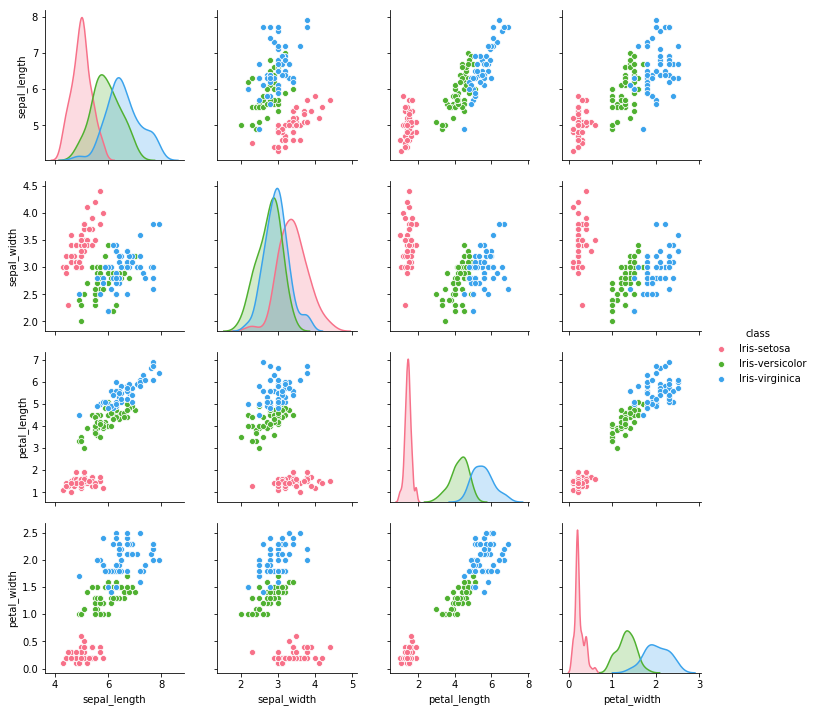

In [4]:
sns.pairplot(df, hue="class", palette="husl")´

<hr>


## <a name="M4">4. Creacción del modelo (hipótesis) y ajuste</a>


* A continuación pasamos a crear un objeto de la clase "***LogisticRegression()***" para la resolución del problema de clasificación.


* Una vez instanciado, procedemos a ajustar (entrenar) el modelo (o hipótesis) llamando al método ***fit(X,y)*** que recibe como parámetros el conjunto de datos de las variables de entrada 'X' y la variable de salida 'Y'.

In [5]:
# Creamos un objeto de la clase LogisticRegression pasandole una serie de parámetros
logreg = LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=50)

# Entrenamos el modelo siendo la 'X' el tamaño del sepalo e 'y' el tipo de flor
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='ovr', n_jobs=None,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<hr>


## <a name="M5">5. Obtención del modelo (hipótesis)</a>


* El objeto de la clase ***LogisticRegression*** nos proporciona los resultados de los parámetros $\beta_n$ por medio de los atributos de la clase:
<span></span><br><br>
    - ***coef_***: Nos devuelve en una matriz los parámetros del $\beta_1$ al $\beta_n$ para cada una de las funciones de decisión.
<span></span><br><br>
    - ***intercept_***: Nos devuelve una lista con los parámetros ***$\beta_0$*** para cada una de las funciones de decisión.
    

* Obteniendo estos valores podemos obtener el modelo generado:

In [6]:
b0 = logreg.intercept_
b = logreg.coef_


print("\nIris-setosa: Z = {b0:0.2f} + {b1:0.2f} · sepal_length + {b2:0.2f} · sepal_width + {b3:0.2f} · petal_length + {b4:0.2f} · petal_width"
      .format(b0=b0[0], b1=b[0,0], b2=b[0,1], b3=b[0,2], b4=b[0,3]))

print("\nIris-versicolor: Z = {b0:0.2f} + {b1:0.2f} · sepal_length + {b2:0.2f} · sepal_width + {b3:0.2f} · petal_length + {b4:0.2f} · petal_width"
      .format(b0=b0[1], b1=b[1,0], b2=b[1,1], b3=b[1,2], b4=b[1,3]))

print("\nIris-virginica: Z = {b0:0.2f} + {b1:0.2f} · sepal_length + {b2:0.2f} · sepal_width + {b3:0.2f} · petal_length + {b4:0.2f} · petal_width"
      .format(b0=b0[2], b1=b[2,0], b2=b[2,1], b3=b[2,2], b4=b[2,3]))


Iris-setosa: Z = 0.27 + 0.41 · sepal_length + 1.46 · sepal_width + -2.26 · petal_length + -1.03 · petal_width

Iris-versicolor: Z = 1.09 + 0.42 · sepal_length + -1.60 · sepal_width + 0.58 · petal_length + -1.39 · petal_width

Iris-virginica: Z = -1.21 + -1.71 · sepal_length + -1.53 · sepal_width + 2.47 · petal_length + 2.56 · petal_width


<hr>


## <a name="M6">6. Cálculo de Predicción</a>


* A continuación vamos a ver como predecir la clase de una Flor usando la librería de Scikit con el método ".predict(flor)" y como obtener esa misma predicción aplicando del modelo obtenido.


* Para ello seleccionemos una flor del Dataset, que para este ejemplo vamos a seleccionar la flor:
    - Class: Iris-Setosa
    - Sepal_lenght: 4.9
    - Sepal_With: 3.0
    - Petal_lenght: 1.4
    - Petal_With: 0.2


In [7]:
X_flor = X[1]
y_flor = y[1]

print('Flor: X={} - y={} - Clase = {}'.format(X_flor, y_flor, le.inverse_transform([y_flor])))

Flor: X=[4.9 3.  1.4 0.2] - y=0 - Clase = ['Iris-setosa']


* A continuación vamos a ver cual es la predicción que nos devuelve Scikit-Learn.


* Vamos también cuales son los parámetros de la función de decisión y cual es el resultado de esa función de decisión para cada clase:

In [8]:
prediccion = logreg.predict([X_flor])
fun_decision = logreg.decision_function([X_flor])

print('Predicción -> Pertenece a la clase {}'.format(prediccion))
print('Predicción Etiquetada -> Pertenece a la clase {}'.format(le.inverse_transform(prediccion)))
print('Resultado de la función de decisión: ' + \
      '\n\tIris-Setosa: {:0.2f}\n\tIris-Versicolor: {:0.2f}\n\tIris-Virginica: {:0.2f}' \
     .format(fun_decision[0,0], fun_decision[0,1], fun_decision[0,2]))

Predicción -> Pertenece a la clase [0]
Predicción Etiquetada -> Pertenece a la clase ['Iris-setosa']
Resultado de la función de decisión: 
	Iris-Setosa: 3.31
	Iris-Versicolor: -1.14
	Iris-Virginica: -10.21


* A continuación vamos a calcular la función de decisión de esa flor para cada clase usando el modelo y posteriormente la probabilidad de pertenencia a cada clase:

In [9]:
# Obtenemos los parámetros
b0 = logreg.intercept_
b = logreg.coef_

# Función de decisión
z_setosa =     b0[0] + (b[0,0] * X_flor[0]) + (b[0,1] * X_flor[1]) + (b[0,2] * X_flor[2]) + (b[0,3] * X_flor[3])
z_versicolor = b0[1] + (b[1,0] * X_flor[0]) + (b[1,1] * X_flor[1]) + (b[1,2] * X_flor[2]) + (b[1,3] * X_flor[3])
z_virginica =  b0[2] + (b[2,0] * X_flor[0]) + (b[2,1] * X_flor[1]) + (b[2,2] * X_flor[2]) + (b[2,3] * X_flor[3])

# Imprimimos las funciones de decisión
print('Función de decisión: ' + \
      '\n\tIris-Setosa: {:0.2f}\n\tIris-Versicolor: {:0.2f}\n\tIris-Virginica: {:0.2f}' \
     .format(z_setosa, z_versicolor, z_virginica))

# Calculamos las probabilidades
prob_setosa =     1 / (1 + math.exp(-1 * (z_setosa)))
prob_versicolor = 1 / (1 + math.exp(-1 * (z_versicolor)))
prob_virginica =  1 / (1 + math.exp(-1 * (z_virginica)))

# Imprimimos las probabilidades
print('\nProbabilidad de pertenencia a cada clase: ' + \
      '\n\tIris-Setosa: {:0.2f}\n\tIris-Versicolor: {:0.2f}\n\tIris-Virginica: {:0.2f}' \
     .format(prob_setosa, prob_versicolor, prob_virginica))

Función de decisión: 
	Iris-Setosa: 3.31
	Iris-Versicolor: -1.14
	Iris-Virginica: -10.21

Probabilidad de pertenencia a cada clase: 
	Iris-Setosa: 0.96
	Iris-Versicolor: 0.24
	Iris-Virginica: 0.00


* Veamos como realizamos esos cálculos con detalle:

In [10]:
# Imprimimos por pantalla la información de cada cálculo
print('\nIris-Setosa ')
print('  Z =  {:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} = {:0.2f}'.
      format(b0[0], b[0,0], X_flor[0], b[0,1], X_flor[1], b[0,2], X_flor[3], b[0,3], X_flor[3], z_setosa))
print('  g(Z) =  1 / 1 + e^-({:0.2f}) = {:0.2f}'.format(z_setosa, 1 / (1 + math.exp(-1 * z_setosa))))


print('\nIris-Versicolor ')
print('  Z =  {:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} = {:0.2f}'.
      format(b0[1], b[1,0], X_flor[0], b[1,1], X_flor[1], b[1,2], X_flor[2], b[1,3], X_flor[3], z_versicolor))
print('  g(Z) =  1 / 1 + e^-({:0.2f}) = {:0.2f}'.format(z_versicolor, 1 / (1 + math.exp(-1 * z_versicolor))))


print('\nIris-Virginica ')
print('  Z =  {:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} = {:0.2f}'.
      format(b0[2], b[2,0], X_flor[0], b[2,1], X_flor[1], b[2,2], X_flor[2], b[2,3], X_flor[3], z_virginica))
print('  g(Z) =  1 / 1 + e^-({:0.2f}) = {:0.2f}'.format(z_virginica, 1 / (1 + math.exp(-1 * z_virginica))))


Iris-Setosa 
  Z =  0.27 + 0.41·4.90 + 1.46·3.00 + -2.26·0.20 + -1.03·0.20 = 3.31
  g(Z) =  1 / 1 + e^-(3.31) = 0.96

Iris-Versicolor 
  Z =  1.09 + 0.42·4.90 + -1.60·3.00 + 0.58·1.40 + -1.39·0.20 = -1.14
  g(Z) =  1 / 1 + e^-(-1.14) = 0.24

Iris-Virginica 
  Z =  -1.21 + -1.71·4.90 + -1.53·3.00 + 2.47·1.40 + 2.56·0.20 = -10.21
  g(Z) =  1 / 1 + e^-(-10.21) = 0.00


<hr>

*Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.*

<img src="./imgs/CC_BY-NC-SA.png" alt="CC BY-NC">